
# **Домашнее задание**


In [1]:
import numpy as np              # Одномерные и многомерные массивы (array)
import pandas as pd             # Таблицы и временные ряды (dataframe, series)
import matplotlib.pyplot as plt # Научная графика
import seaborn as sns           # Еще больше красивой графики для визуализации данных
import sklearn                  # Алгоритмы машинного обучения

# Классификация прогнозов заработной платы

Классификация по зарплате: меньше 50 тыс. или больше 50 тыс.

# 1. Загружаем данные

Загружаем файл из интернета:

In [2]:
url = "https://raw.githubusercontent.com/Branislava98/Machine-Learning/main/income.csv"
data_raw = pd.read_csv(url)

Таблица содержит данные о более 31 тысяч человек. Для каждого указаны его возраст, рабочий класс, образование, семейное положение,
профессия, отношения, раса, пол, прирост капитала, убыток капитала, количество часов в неделю, родная страна и зарплата.


Вначале посмотрим на размеры таблицы - количество строк (каждая строка соответствует одной квартире) и количество столбцов (каждый столбец соответствует конкретному признаку):

In [3]:
data_raw.shape

(31978, 13)

In [4]:
data_raw

,age,JobType,EdType,maritalstatus,occupation,relationship,race,gender,capitalgain,capitalloss,hoursperweek,nativecountry,SalStat
0,45,Private,HS-grad,Divorced,Adm-clerical,Not-in-family,White,Female,0,0,28,United-States,"less than or equal to 50,000"
1,24,Federal-gov,HS-grad,Never-married,Armed-Forces,Own-child,White,Male,0,0,40,United-States,"less than or equal to 50,000"
2,44,Private,Some-college,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,40,United-States,"greater than 50,000"
3,27,Private,9th,Never-married,Craft-repair,Other-relative,White,Male,0,0,40,Mexico,"less than or equal to 50,000"
4,20,Private,Some-college,Never-married,Sales,Not-in-family,White,Male,0,0,35,United-States,"less than or equal to 50,000"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
31973,34,Local-gov,HS-grad,Never-married,Farming-fishing,Not-in-family,Black,Male,594,0,60,United-States,"less than or equal to 50,000"
31974,34,Local-gov,Some-college,Never-married,Protective-serv,Not-in-family,White,Female,0,0,40,United-States,"less than or equal to 50,000"
31975,23,Private,Some-college,Married-civ-spouse,Adm-clerical,Husband,White,Male,0,0,40,United-States,"less than or equal to 50,000"
31976,42,Local-gov,Some-college,Married-civ-spouse,Adm-clerical,Wife,White,Female,0,0,40,United-States,"less than or equal to 50,000"


Мы видим, что столбцы (признаки) имеют имена

- `age` - непрерывный
- `JobType` - `'Private'`, `'Self-emp-not-inc'`, `'Self-emp-inc'`, `'Federal-gov'`, `'Local-gov'`, `'State-gov'`, `'Without-pay'`, `'Never-worked'`.

- `EdType` - `'Bachelors'`, `'Some-college'`, `'11th'`, `'HS-grad'`, `'Prof-school'`, `'Assoc-acdm'`, `'Assoc-voc'`, `'9th'`, `'7th-8th'`, `'12th'`, `'Masters'`, `'1st-4th'`, `'10th'`, `'Doctorate'`, `'5th-6th'`, `'Preschool'`
- `maritalstatus` - `'Married-civ-spouse'`, `'Divorced'`, `'Never-married'`, `'Separated'`, `'Widowed'`, `'Married-spouse-absent'`, `'Married-AF-spouse'`
- `occupation` -`'Tech-support'`, `'Craft-repair'`, `'Other-service'`, `'Sales'`, `'Exec-managerial'`, `'Prof-specialty'`, `'Handlers-cleaners'`, `'Machine-op-inspct'`, `'Adm-clerical'`, `'Farming-fishing'`, `'Transport-moving'`, `'Priv-house-serv'`, `'Protective-serv'`, `'Armed-Forces'`
- `relationship` - `'Wife'`, `'Own-child'`, `'Husband'`, `'Not-in-family'`, `'Other-relative'`, `'Unmarried'`
- `race` - `'White'`, `'Asian-Pac-Islander'`, `'Amer-Indian-Eskimo'`, `'Other'`, `'Black'`
- `gender` -  `'Female'`, `'Male'`
- `capitalgain` - непрерывный
- `capitalloss` - непрерывный
- `hoursperweek` - непрерывный
- `nativecountry` - США, Камбоджа, Англия, Пуэрто-Рико, Канада, Германия, отдаленные районы США (Гуам-USVI-и т. д.), Индия, Япония, Греция, Юг, Китай, Куба, Иран, Гондурас, Филиппины, Италия , Польша, Ямайка, Вьетнам, Мексика, Португалия, Ирландия, Франция, Доминиканская Республика, Лаос, Эквадор, Тайвань, Гаити, Колумбия, Венгрия, Гватемала, Никарагуа, Шотландия, Таиланд, Югославия, Сальвадор, Тринадад и Тобаго, Перу, Гонконг , Голландия-Нидерланды
- `SalStat` - <=50K или >50K

Признаки `JobType`, `EdType`, `maritalstatus`, `occupation`, `relationship`, `race` и `nativecountry`- номинальный (категориальный), `gender`и `SalStat` - бинарный, остальные признаки - количественный (числовой).

Задача прогнозирования — определить, зарабатывает ли человек более 50 тысяч в год.

Типы признаков:

- Качественные (*категориальные*, *факторные*):
  - Неупорядоченные (*номинальные*)
  - Упорядоченные (*порядковые*)
- Количественные (*числовые*):
  - *Непрерывные*
  - *Дискретные*

*Бинарные* признаки (которые принимают только два значения) можно считать и номинальными, и порядковыми, и дискретными    

Имена столбцов (признаков) можно получить таким образом:

Столбцы `JobType`, `EdType`, `maritalstatus`, `occupation`, `relationship`, `race`, `gender`, `SalStast` и `nativecountry` содержат категориальные значения. Пока они имеют тип `'Object`'. Заменим тип на специальный, предназначенный для хранения категориальных значений:

Pandas реализует 2 основных класса: Series, DataFrame

In [5]:
type(data_raw)

pandas.core.frame.DataFrame

In [6]:
type(data_raw['JobType'])

pandas.core.series.Series

In [7]:
data_raw['JobType'].dtype

dtype('O')

In [8]:
data_raw['JobType'] = data_raw['JobType'].astype('category')
data_raw['JobType'].dtype

CategoricalDtype(categories=[' ?', ' Federal-gov', ' Local-gov', ' Never-worked',
                  ' Private', ' Self-emp-inc', ' Self-emp-not-inc',
                  ' State-gov', ' Without-pay'],
, ordered=False)

In [9]:
data_raw['EdType'] = data_raw['EdType'].astype('category')
data_raw['EdType'].dtype

CategoricalDtype(categories=[' 10th', ' 11th', ' 12th', ' 1st-4th', ' 5th-6th',
                  ' 7th-8th', ' 9th', ' Assoc-acdm', ' Assoc-voc',
                  ' Bachelors', ' Doctorate', ' HS-grad', ' Masters',
                  ' Preschool', ' Prof-school', ' Some-college'],
, ordered=False)

In [10]:
data_raw['maritalstatus'] = data_raw['maritalstatus'].astype('category')
data_raw['maritalstatus'].dtype

CategoricalDtype(categories=[' Divorced', ' Married-AF-spouse', ' Married-civ-spouse',
                  ' Married-spouse-absent', ' Never-married', ' Separated',
                  ' Widowed'],
, ordered=False)

In [11]:
data_raw['occupation'] = data_raw['occupation'].astype('category')
data_raw['occupation'].dtype

CategoricalDtype(categories=[' ?', ' Adm-clerical', ' Armed-Forces', ' Craft-repair',
                  ' Exec-managerial', ' Farming-fishing', ' Handlers-cleaners',
                  ' Machine-op-inspct', ' Other-service', ' Priv-house-serv',
                  ' Prof-specialty', ' Protective-serv', ' Sales',
                  ' Tech-support', ' Transport-moving'],
, ordered=False)

In [12]:
data_raw['relationship'] = data_raw['relationship'].astype('category')
data_raw['relationship'].dtype

CategoricalDtype(categories=[' Husband', ' Not-in-family', ' Other-relative',
                  ' Own-child', ' Unmarried', ' Wife'],
, ordered=False)

In [13]:
data_raw['race'] = data_raw['race'].astype('category')
data_raw['race'].dtype

CategoricalDtype(categories=[' Amer-Indian-Eskimo', ' Asian-Pac-Islander', ' Black',
                  ' Other', ' White'],
, ordered=False)

In [14]:
data_raw['gender'] = data_raw['gender'].astype('category')
data_raw['gender'].dtype

CategoricalDtype(categories=[' Female', ' Male'], ordered=False)

In [15]:
data_raw['nativecountry'] = data_raw['nativecountry'].astype('category')
data_raw['nativecountry'].dtype

CategoricalDtype(categories=[' Cambodia', ' Canada', ' China', ' Columbia', ' Cuba',
                  ' Dominican-Republic', ' Ecuador', ' El-Salvador',
                  ' England', ' France', ' Germany', ' Greece', ' Guatemala',
                  ' Haiti', ' Holand-Netherlands', ' Honduras', ' Hong',
                  ' Hungary', ' India', ' Iran', ' Ireland', ' Italy',
                  ' Jamaica', ' Japan', ' Laos', ' Mexico', ' Nicaragua',
                  ' Outlying-US(Guam-USVI-etc)', ' Peru', ' Philippines',
                  ' Poland', ' Portugal', ' Puerto-Rico', ' Scotland',
                  ' South', ' Taiwan', ' Thailand', ' Trinadad&Tobago',
                  ' United-States', ' Vietnam', ' Yugoslavia'],
, ordered=False)

In [16]:
data_raw['SalStat'] = data_raw['SalStat'].astype('category')
data_raw['SalStat'].dtype

CategoricalDtype(categories=[' greater than 50,000', ' less than or equal to 50,000'], ordered=False)

In [17]:
data_raw.describe()

,age,capitalgain,capitalloss,hoursperweek
count,31978.000000,31978.000000,31978.000000,31978.000000
mean,38.579023,1064.360623,86.739352,40.417850
std,13.662085,7298.596271,401.594301,12.345285
min,17.000000,0.000000,0.000000,1.000000
25%,28.000000,0.000000,0.000000,40.000000
50%,37.000000,0.000000,0.000000,40.000000
75%,48.000000,0.000000,0.000000,45.000000
max,90.000000,99999.000000,4356.000000,99.000000


In [18]:
data_raw.describe(include=['category'])

,JobType,EdType,maritalstatus,occupation,relationship,race,gender,nativecountry,SalStat
count,31978,31978,31978,31978,31978,31978,31978,31978,31978
unique,9,16,7,15,6,5,2,41,2
top,Private,HS-grad,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States,"less than or equal to 50,000"
freq,22286,10368,14692,4038,12947,27430,21370,29170,24283


##  1.1. Заполнение пропущенных значений 

Пропущенные значения в таблице представлены значениями `np.nan`. 
Посмотрим, сколько пропущенных значений в каждом столбце матрицы:
`na` - not available

In [19]:
data_raw.isna().sum()  

age              0
JobType          0
EdType           0
maritalstatus    0
occupation       0
relationship     0
race             0
gender           0
capitalgain      0
capitalloss      0
hoursperweek     0
nativecountry    0
SalStat          0
dtype: int64

In [20]:
data_raw.describe()

,age,capitalgain,capitalloss,hoursperweek
count,31978.000000,31978.000000,31978.000000,31978.000000
mean,38.579023,1064.360623,86.739352,40.417850
std,13.662085,7298.596271,401.594301,12.345285
min,17.000000,0.000000,0.000000,1.000000
25%,28.000000,0.000000,0.000000,40.000000
50%,37.000000,0.000000,0.000000,40.000000
75%,48.000000,0.000000,0.000000,45.000000
max,90.000000,99999.000000,4356.000000,99.000000


В данном датасете нет пропущенных значений.

In [21]:
data_raw['age'].quantile([0.005,.01,.05,.1,.5,.9,.95,.99,.995])

0.005    17.0
0.010    17.0
0.050    19.0
0.100    22.0
0.500    37.0
0.900    58.0
0.950    63.0
0.990    74.0
0.995    78.0
Name: age, dtype: float64

In [22]:
data_raw['hoursperweek'].quantile([0.005,.01,.05,.1,.5,.9,.95,.99,.995])

0.005     5.0
0.010     8.0
0.050    18.0
0.100    24.0
0.500    40.0
0.900    55.0
0.950    60.0
0.990    80.0
0.995    84.0
Name: hoursperweek, dtype: float64

Мы видим, например, что $99\%$ всех значений признака `'age'` находится в диапазоне от $17$ до $78$ лет. (это значения квантилей, соответствующих уровням $0.005$ и $0.995$ соответственно)

$99\%$ всех значений `'hoursperweek'` находится в диапазоне от $5$ до $84$ часов. 

Удалим все строки таблицы, в которых `'age'` или `'hoursperweek'` выходят за пределы квантилей $0.005$, $0.995$.

In [23]:
rows_to_drop = data_raw[
    (data_raw['age'] < data_raw['age'].quantile(0.005)) | (data_raw['age'] > data_raw['age'].quantile(0.995)) | 
    (data_raw['hoursperweek']  < data_raw['hoursperweek' ].quantile(0.005)) | (data_raw['hoursperweek']  > data_raw['hoursperweek' ].quantile(0.995))].index
data = data_raw.drop(rows_to_drop)
data.shape

(31550, 13)

In [24]:
data.describe()

,age,capitalgain,capitalloss,hoursperweek
count,31550.000000,31550.000000,31550.000000,31550.000000
mean,38.317940,1066.803487,86.460919,40.358130
std,13.297711,7335.786272,399.964384,11.477235
min,17.000000,0.000000,0.000000,5.000000
25%,28.000000,0.000000,0.000000,40.000000
50%,37.000000,0.000000,0.000000,40.000000
75%,47.000000,0.000000,0.000000,45.000000
max,78.000000,99999.000000,4356.000000,84.000000


In [25]:
data.describe(include=['category'])

,JobType,EdType,maritalstatus,occupation,relationship,race,gender,nativecountry,SalStat
count,31550,31550,31550,31550,31550,31550,31550,31550,31550
unique,9,16,7,15,6,5,2,41,2
top,Private,HS-grad,Married-civ-spouse,Craft-repair,Husband,White,Male,United-States,"less than or equal to 50,000"
freq,22110,10231,14467,4008,12748,27050,21072,28773,23939


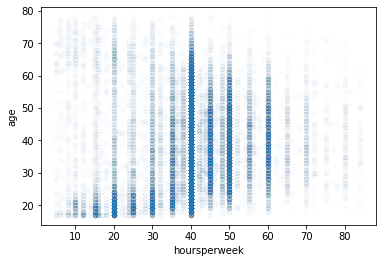

In [26]:
data.plot(kind = 'scatter', x = 'hoursperweek', y = 'age', alpha=.01)
pass

Можно вычислить матрицу корреляции для количественных признаков:

In [27]:
corr_mat = data.corr()
corr_mat

,age,capitalgain,capitalloss,hoursperweek
age,1.000000,0.080096,0.057264,0.098179
capitalgain,0.080096,1.000000,-0.031438,0.085678
capitalloss,0.057264,-0.031438,1.000000,0.054604
hoursperweek,0.098179,0.085678,0.054604,1.000000


Удобно использовать визуальный образ этой матрицы. Чем светлее ячейка, тем больше по абсолютной величине коэффициент корреляции:

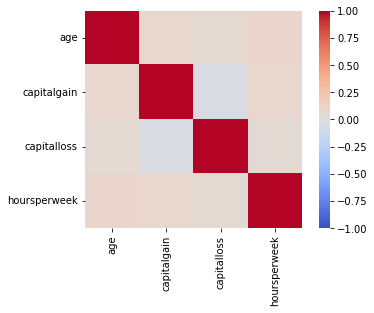

In [28]:
sns.heatmap(corr_mat, square=True, vmin=-1, vmax=1, cmap='coolwarm')
pass

## 2. Бинаризация номинальных признаков

Алгоритмы из библиотеки scikit-learn (почти) не умеют работать напрямую с категориальными признаками. Поэтому их вначале надо закодировать с помощью числовых принаков.

Бинарные признаки `'gender'` и `'SalStat'` заменим на числовой. 

- `'Female'` → 0, `'Male'`→ 1 
- `'less than or equal to 50,000'` → 0, `'greater than 50,000'`→ 1 

Сделать это можно так:

In [29]:
data['gender'] = pd.factorize(data['gender'])[0]
data['SalStat'] = pd.factorize(data['SalStat'])[0]

К категориальным (небинарному) признакам `JobType`, `EdType`, `maritalstatus`, `relationship`и `race` применим метод *бинаризации* (*one-hot encoding*).

Категориальные признаки  `occupation`и `nativecountry` исключаем.


In [30]:
job_dummies = pd.get_dummies(data['JobType'])

In [31]:
job_dummies.head()

,?,Federal-gov,Local-gov,Never-worked,Private,Self-emp-inc,Self-emp-not-inc,State-gov,Without-pay
0,0,0,0,0,1,0,0,0,0
1,0,1,0,0,0,0,0,0,0
2,0,0,0,0,1,0,0,0,0
3,0,0,0,0,1,0,0,0,0
4,0,0,0,0,1,0,0,0,0


Добавим эти dummy-столбцы к таблице и удалим столбец `Building`:

In [32]:
data = pd.concat((data, job_dummies), axis=1)
data = data.drop(['JobType'], axis=1)

In [33]:
ed_dummies = pd.get_dummies(data['EdType'])
ed_dummies.head()

,10th,11th,12th,1st-4th,5th-6th,7th-8th,9th,Assoc-acdm,Assoc-voc,Bachelors,Doctorate,HS-grad,Masters,Preschool,Prof-school,Some-college
0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [34]:
data = pd.concat((data, ed_dummies), axis=1)
data = data.drop(['EdType'], axis=1)

In [35]:
marital_status_dummies = pd.get_dummies(data['maritalstatus'])
marital_status_dummies.head()

,Divorced,Married-AF-spouse,Married-civ-spouse,Married-spouse-absent,Never-married,Separated,Widowed
0,1,0,0,0,0,0,0
1,0,0,0,0,1,0,0
2,0,0,1,0,0,0,0
3,0,0,0,0,1,0,0
4,0,0,0,0,1,0,0


In [36]:
data = pd.concat((data, marital_status_dummies), axis=1)
data = data.drop(['maritalstatus'], axis=1)

In [37]:
relationship_dummies = pd.get_dummies(data['relationship'])
relationship_dummies.head()

,Husband,Not-in-family,Other-relative,Own-child,Unmarried,Wife
0,0,1,0,0,0,0
1,0,0,0,1,0,0
2,1,0,0,0,0,0
3,0,0,1,0,0,0
4,0,1,0,0,0,0


In [38]:
data = pd.concat((data, relationship_dummies), axis=1)
data = data.drop(['relationship'], axis=1)

In [39]:
race_dummies = pd.get_dummies(data['race'])
race_dummies.head()

,Amer-Indian-Eskimo,Asian-Pac-Islander,Black,Other,White
0,0,0,0,0,1
1,0,0,0,0,1
2,0,0,0,0,1
3,0,0,0,0,1
4,0,0,0,0,1


In [40]:
data = pd.concat((data, race_dummies), axis=1)
data = data.drop(['race'], axis=1)

In [41]:
data.head()

,age,occupation,gender,capitalgain,capitalloss,hoursperweek,nativecountry,SalStat,?,Federal-gov,...,Not-in-family,Other-relative,Own-child,Unmarried,Wife,Amer-Indian-Eskimo,Asian-Pac-Islander,Black,Other,White
0,45,Adm-clerical,0,0,0,28,United-States,0,0,0,...,1,0,0,0,0,0,0,0,0,1
1,24,Armed-Forces,1,0,0,40,United-States,0,0,1,...,0,0,1,0,0,0,0,0,0,1
2,44,Prof-specialty,1,0,0,40,United-States,1,0,0,...,0,0,0,0,0,0,0,0,0,1
3,27,Craft-repair,1,0,0,40,Mexico,0,0,0,...,0,1,0,0,0,0,0,0,0,1
4,20,Sales,1,0,0,35,United-States,0,0,0,...,1,0,0,0,0,0,0,0,0,1


In [42]:
data.describe(include=['category'])

,occupation,nativecountry
count,31550,31550
unique,15,41
top,Craft-repair,United-States
freq,4008,28773


In [43]:
data.shape

(31550, 51)

In [44]:
data = data.drop(['occupation'], axis=1)
data = data.drop(['nativecountry'], axis=1)

In [45]:
data.shape

(31550, 49)

In [46]:
data.describe()

,age,gender,capitalgain,capitalloss,hoursperweek,SalStat,?,Federal-gov,Local-gov,Never-worked,...,Not-in-family,Other-relative,Own-child,Unmarried,Wife,Amer-Indian-Eskimo,Asian-Pac-Islander,Black,Other,White
count,31550.000000,31550.000000,31550.000000,31550.000000,31550.000000,31550.000000,31550.000000,31550.000000,31550.000000,31550.000000,...,31550.000000,31550.000000,31550.000000,31550.000000,31550.000000,31550.000000,31550.000000,31550.000000,31550.000000,31550.000000
mean,38.317940,0.667892,1066.803487,86.460919,40.358130,0.241236,0.054136,0.029762,0.064849,0.000190,...,0.254707,0.029826,0.157147,0.106434,0.047829,0.009762,0.029762,0.095119,0.007987,0.857369
std,13.297711,0.470977,7335.786272,399.964384,11.477235,0.427840,0.226290,0.169934,0.246264,0.013789,...,0.435703,0.170109,0.363945,0.308397,0.213407,0.098322,0.169934,0.293384,0.089016,0.349701
min,17.000000,0.000000,0.000000,0.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,28.000000,0.000000,0.000000,0.000000,40.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,37.000000,1.000000,0.000000,0.000000,40.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,47.000000,1.000000,0.000000,0.000000,45.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,78.000000,1.000000,99999.000000,4356.000000,84.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [47]:
np.isnan(data.isna().sum())

age                       False
gender                    False
capitalgain               False
capitalloss               False
hoursperweek              False
SalStat                   False
 ?                        False
 Federal-gov              False
 Local-gov                False
 Never-worked             False
 Private                  False
 Self-emp-inc             False
 Self-emp-not-inc         False
 State-gov                False
 Without-pay              False
 10th                     False
 11th                     False
 12th                     False
 1st-4th                  False
 5th-6th                  False
 7th-8th                  False
 9th                      False
 Assoc-acdm               False
 Assoc-voc                False
 Bachelors                False
 Doctorate                False
 HS-grad                  False
 Masters                  False
 Preschool                False
 Prof-school              False
 Some-college             False
 Divorce

## 3. Масштабирование количественных признаков

Перед применением алгоритмов машинного обучения количественные признаки полезно нормализовать.

Наиболее часто используют один из двух следующих способов:
- *нормализация*, или *приведение к отрезку $[0,1]$* - это линейное преобразование, приводящее все значения к заданному отрезку;
- *стандартизация* - линейное преобразование, приводящее все значения к нулевому среднему и единичному стандартному отклонению.

Выполним стандартизацию всех признаков:

In [48]:
data['age']= (data['age'] - data['age'].mean(axis = 0))/data['age'].std(axis = 0)
data['hoursperweek']= (data['hoursperweek'] - data['hoursperweek'].mean(axis = 0))/data['hoursperweek'].std(axis = 0)
data['capitalgain']= (data['capitalgain'] - data['capitalgain'].mean(axis = 0))/data['capitalgain'].std(axis = 0)
data['capitalloss']= (data['capitalloss'] - data['capitalloss'].mean(axis = 0))/data['capitalloss'].std(axis = 0)

In [49]:
data['age'].describe()

count    3.155000e+04
mean    -1.306228e-16
std      1.000000e+00
min     -1.603129e+00
25%     -7.759185e-01
50%     -9.911027e-02
75%      6.528989e-01
max      2.984127e+00
Name: age, dtype: float64

In [50]:
data['hoursperweek'].describe()

count    3.155000e+04
mean     2.441294e-16
std      1.000000e+00
min     -3.080719e+00
25%     -3.120351e-02
50%     -3.120351e-02
75%      4.044415e-01
max      3.802473e+00
Name: hoursperweek, dtype: float64

In [51]:
data['capitalgain'].describe()

count    3.155000e+04
mean    -1.936820e-17
std      1.000000e+00
min     -1.454246e-01
25%     -1.454246e-01
50%     -1.454246e-01
75%     -1.454246e-01
max      1.348624e+01
Name: capitalgain, dtype: float64

In [52]:
data['capitalloss'].describe()

count    3.155000e+04
mean     6.350968e-17
std      1.000000e+00
min     -2.161715e-01
25%     -2.161715e-01
50%     -2.161715e-01
75%     -2.161715e-01
max      1.067480e+01
Name: capitalloss, dtype: float64

А можно нормализацию:

## 4. Отбор признаков 

Для предсказания зарабатывает ли человек более 50 тысяч в год будем использовать все входные признаки.

In [53]:
data.describe()

,age,gender,capitalgain,capitalloss,hoursperweek,SalStat,?,Federal-gov,Local-gov,Never-worked,...,Not-in-family,Other-relative,Own-child,Unmarried,Wife,Amer-Indian-Eskimo,Asian-Pac-Islander,Black,Other,White
count,3.155000e+04,31550.000000,3.155000e+04,3.155000e+04,3.155000e+04,31550.000000,31550.000000,31550.000000,31550.000000,31550.000000,...,31550.000000,31550.000000,31550.000000,31550.000000,31550.000000,31550.000000,31550.000000,31550.000000,31550.000000,31550.000000
mean,-1.306228e-16,0.667892,-1.936820e-17,6.350968e-17,2.441294e-16,0.241236,0.054136,0.029762,0.064849,0.000190,...,0.254707,0.029826,0.157147,0.106434,0.047829,0.009762,0.029762,0.095119,0.007987,0.857369
std,1.000000e+00,0.470977,1.000000e+00,1.000000e+00,1.000000e+00,0.427840,0.226290,0.169934,0.246264,0.013789,...,0.435703,0.170109,0.363945,0.308397,0.213407,0.098322,0.169934,0.293384,0.089016,0.349701
min,-1.603129e+00,0.000000,-1.454246e-01,-2.161715e-01,-3.080719e+00,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-7.759185e-01,0.000000,-1.454246e-01,-2.161715e-01,-3.120351e-02,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,-9.911027e-02,1.000000,-1.454246e-01,-2.161715e-01,-3.120351e-02,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,6.528989e-01,1.000000,-1.454246e-01,-2.161715e-01,4.044415e-01,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,2.984127e+00,1.000000,1.348624e+01,1.067480e+01,3.802473e+00,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [54]:
data.columns

Index(['age', 'gender', 'capitalgain', 'capitalloss', 'hoursperweek',
       'SalStat', ' ?', ' Federal-gov', ' Local-gov', ' Never-worked',
       ' Private', ' Self-emp-inc', ' Self-emp-not-inc', ' State-gov',
       ' Without-pay', ' 10th', ' 11th', ' 12th', ' 1st-4th', ' 5th-6th',
       ' 7th-8th', ' 9th', ' Assoc-acdm', ' Assoc-voc', ' Bachelors',
       ' Doctorate', ' HS-grad', ' Masters', ' Preschool', ' Prof-school',
       ' Some-college', ' Divorced', ' Married-AF-spouse',
       ' Married-civ-spouse', ' Married-spouse-absent', ' Never-married',
       ' Separated', ' Widowed', ' Husband', ' Not-in-family',
       ' Other-relative', ' Own-child', ' Unmarried', ' Wife',
       ' Amer-Indian-Eskimo', ' Asian-Pac-Islander', ' Black', ' Other',
       ' White'],
      dtype='object')

In [55]:
X = data.drop(['SalStat'], axis=1)
y = data['SalStat']

In [56]:
type(X), type(y)

(pandas.core.frame.DataFrame, pandas.core.series.Series)

Можно конвертировать таблицы в массивы:

In [57]:
X = np.array(X)
y = np.array(y)

# 5. Обучаем модель

Разобьем данные на обучающую и тестовую выборки в пропорции 3:1 (70% - обучающая выборка, 30% - тестовая):

In [58]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

N_train, _ = X_train.shape 
N_test,  _ = X_test.shape 

N_train, N_test

(22085, 9465)

In [59]:
X_train.shape

(22085, 48)

### Измеряем метрики качества


## 5.1 Метод $k$ ближайших соседей ($k$NN, $k$ nearest neighbours)

In [60]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(n_neighbors=7) # по умолчанию n_neighbors=5
model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=7)

In [61]:
y_train_predict = model.predict(X_train)
y_test_predict  = model.predict(X_test)

err_train  = np.mean(y_train  != y_train_predict)
err_train = 1 - model.score(X_train, y_train)

err_test  = np.mean(y_test  != y_test_predict)
err_test = 1 - model.score(X_test, y_test)

In [62]:
err_table = pd.DataFrame(columns=('train', 'test'))
err_table.loc['k Nearest Neighbours_7', :] = (err_train, err_test)
err_table

,train,test
k Nearest Neighbours_7,0.131356,0.163022


In [63]:
model = KNeighborsClassifier(n_neighbors=10) # по умолчанию n_neighbors=5
model.fit(X_train, y_train)

y_train_predict = model.predict(X_train)
y_test_predict  = model.predict(X_test)

err_train  = np.mean(y_train  != y_train_predict)
err_train = 1 - model.score(X_train, y_train)

err_test  = np.mean(y_test  != y_test_predict)
err_test = 1 - model.score(X_test, y_test)

In [64]:

err_table.loc['k Nearest Neighbours_10', :] = (err_train, err_test)
err_table

,train,test
k Nearest Neighbours_7,0.131356,0.163022
k Nearest Neighbours_10,0.137967,0.160486


In [65]:
model = KNeighborsClassifier(n_neighbors=20) # по умолчанию n_neighbors=5
model.fit(X_train, y_train)

y_train_predict = model.predict(X_train)
y_test_predict  = model.predict(X_test)

err_train  = np.mean(y_train  != y_train_predict)
err_train = 1 - model.score(X_train, y_train)

err_test  = np.mean(y_test  != y_test_predict)
err_test = 1 - model.score(X_test, y_test)

In [66]:
err_table.loc['k Nearest Neighbours_20', :] = (err_train, err_test)
err_table

,train,test
k Nearest Neighbours_7,0.131356,0.163022
k Nearest Neighbours_10,0.137967,0.160486
k Nearest Neighbours_20,0.144532,0.154992


## 5.2 Выводы

Были проведены эксперименты в которых изменилось количество соседей. Как видно из верхней таблицы метод ближайших соседей работал лучше когда число соседей равнялось 20. 

## 5.3 Полносвязная нейронная сеть (Full-connected Neural Network)

Full connected neural network, or multi-layer perceptron

In [67]:
from sklearn.neural_network import MLPClassifier

model = MLPClassifier(hidden_layer_sizes=(20,10))
model.fit(X_train, y_train)

y_train_predict = model.predict(X_train)
y_test_predict  = model.predict(X_test)

err_train  = np.mean(y_train  != y_train_predict)
err_train = 1 - model.score(X_train, y_train)

err_test  = np.mean(y_test  != y_test_predict)
err_test = 1 - model.score(X_test, y_test)

err_table.loc['Neural Network', :] = (err_train, err_test)
err_table

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


,train,test
k Nearest Neighbours_7,0.131356,0.163022
k Nearest Neighbours_10,0.137967,0.160486
k Nearest Neighbours_20,0.144532,0.154992
Neural Network,0.133484,0.153513


## 5.4 Случайный лес (Random Forest)

In [68]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=200) # по умолчанию n_estimators=100
model.fit(X_train, y_train)

y_train_predict = model.predict(X_train)
y_test_predict  = model.predict(X_test)

err_train  = np.mean(y_train  != y_train_predict)
err_train = 1 - model.score(X_train, y_train)

err_test  = np.mean(y_test  != y_test_predict)
err_test = 1 - model.score(X_test, y_test)

err_table.loc['Random Forest', :] = (err_train, err_test)
err_table

,train,test
k Nearest Neighbours_7,0.131356,0.163022
k Nearest Neighbours_10,0.137967,0.160486
k Nearest Neighbours_20,0.144532,0.154992
Neural Network,0.133484,0.153513
Random Forest,0.045823,0.156683


## 5.5 Градиентный бустинг (Gradient Boosting)

In [69]:
from sklearn.ensemble import GradientBoostingClassifier

model = GradientBoostingClassifier(n_estimators=200) # по умолчанию n_estimators=100
model.fit(X_train, y_train)

y_train_predict = model.predict(X_train)
y_test_predict  = model.predict(X_test)

err_train  = np.mean(y_train  != y_train_predict)
err_train = 1 - model.score(X_train, y_train)

err_test  = np.mean(y_test  != y_test_predict)
err_test = 1 - model.score(X_test, y_test)

err_table.loc['Gradient Boosting', :] = (err_train, err_test)
err_table

,train,test
k Nearest Neighbours_7,0.131356,0.163022
k Nearest Neighbours_10,0.137967,0.160486
k Nearest Neighbours_20,0.144532,0.154992
Neural Network,0.133484,0.153513
Random Forest,0.045823,0.156683
Gradient Boosting,0.12959,0.138299


## 5.6 Общие выводы

В последних экспериментах использовались разные методы обучения. Ошибки обучения приведены в таблице. Как видно самым лучшим методом оказался метод Gradient Boosting где ошибка на тренировочной выборке составила 12,9% и 13,8% на тестовой. Самым худшим методом оказался метод Random Forest из-за переобучения на тренировочной выборке.